# EDA 1
I'm separating the exploratory data analysis in two streams, one will be from a Football standpoint while the second one will be more focus on the stastistical analysis of the dataset.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

def load_data(file_path):
    """
    Load data from a CSV file.
    
    Parameters:
    file_path (str): Path to the CSV file.
    
    Returns:
    pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_csv(file_path)

def plot_histograms_by_half(data):
    """
    Plot histograms of 'half_seconds_remaining' by 'game_half'.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    half_labels = data['game_half'].unique()

    for idx, half in enumerate(half_labels):
        ax = axs[idx]
        data[data['game_half'] == half]['half_seconds_remaining'].hist(ax=ax, bins=15)
        ax.set_title(f'Game Half: {half}')
        ax.set_xlabel('Half Seconds Remaining')
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.suptitle('4th Down Distribution by Half Seconds Remaining', fontsize=16)
    plt.show()

def plot_field_position(data):
    """
    Plot scatter plot of play starting field positions.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    random_pos_x = np.random.randint(low=20, high=60, size=data.shape[0])

    plt.scatter(random_pos_x, data['yardline_100'], c='blue', label='Play', alpha=0.5, marker='o')
    plt.xlim(0, 80)
    plt.ylim(0, 100)
    plt.title("4th Down Distribution by Play Starting Field Position")
    plt.xlabel("Random X Position (for visualization)")
    plt.ylabel("Yardline")
    plt.xticks([])
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
    plt.legend()
    plt.show()

def plot_position_by_half(data):
    """
    Plot scatter plot of play starting field positions by half.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    fig, axs = plt.subplots(1, len(data['game_half'].unique()), figsize=(15, 5))
    half_labels = data['game_half'].unique()

    for idx, half in enumerate(half_labels):
        ax = axs[idx]
        random_pos_x = np.random.randint(low=20, high=60, size=data[data['game_half'] == half].shape[0])
        ax.scatter(random_pos_x, data[data['game_half'] == half]['yardline_100'], c='blue', label='Play', alpha=0.5, marker='o')
        ax.set_xlim(0, 80)
        ax.set_ylim(0, 100)
        ax.set_title(f'Game Half: {half}')
        ax.set_xlabel("Random X Position (for visualization)")
        ax.set_ylabel("Yardline")
        ax.set_xticks([])
        ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
        ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.suptitle('4th Down Distribution by Play Starting Field Position', fontsize=16)
    plt.show()

def plot_pie_charts(data):
    """
    Plot pie charts of play types, subtypes, and locations.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['#66c2a5', '#3288bd', '#5e4fa2']

    for idx, var in enumerate(['play_type', 'play_subtype', 'play_location']):
        ax = axs[idx]
        counts = data[var].value_counts()
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors[:len(counts)])
        ax.set_title(f'{var}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.suptitle('Distribution of Play Types, Subtypes, and Locations', fontsize=16)
    plt.show()

def plot_play_type_distribution(data):
    """
    Plot scatter plot of play starting field positions by play type.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    pass_data = data[data['play_type'] == 'pass']
    run_data = data[data['play_type'] == 'run']

    random_pos_x_pass = np.random.randint(low=20, high=60, size=pass_data.shape[0])
    random_pos_x_run = np.random.randint(low=20, high=60, size=run_data.shape[0])

    plt.scatter(random_pos_x_pass, pass_data['yardline_100'], c='blue', label='Pass', alpha=0.5, marker='o')
    plt.scatter(random_pos_x_run, run_data['yardline_100'], c='red', label='Run', alpha=0.5, marker='^')

    plt.xlim(0, 80)
    plt.ylim(0, 100)
    plt.title("Play Type Distribution by Play Starting Position")
    plt.xlabel("Random X Position (for visualization)")
    plt.ylabel("Yardline")
    plt.xticks([20, 40, 60])
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
    plt.legend()
    plt.show()

def plot_success_rates(data):
    """
    Plot success rates by play subtype and location.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    yardline_grouped = data.groupby(['play_subtype', 'play_location'])
    yardline_success_rate = yardline_grouped['fourth_down_converted'].apply(lambda x: (x == 'Converted').mean())
    counts = yardline_grouped.size()
    grouped_stats = pd.DataFrame({'count': counts, 'success_rate': yardline_success_rate}).reset_index()

    play_subtypes = grouped_stats['play_subtype'].unique()
    num_subtypes = len(play_subtypes)
    ncols = 3
    nrows = (num_subtypes + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
    axes = axes.flatten()
    sns.set_palette("coolwarm")

    for i, subtype in enumerate(data['play_subtype'].unique()):
        ax = axes[i]
        subset = grouped_stats[grouped_stats['play_subtype'] == subtype]
        ax.set_title(subtype, fontsize=14, fontweight='bold', color='darkblue')
        ax.set_xlim(0, 80)
        ax.set_ylim(0, 100)
        ax.set_facecolor('#f0f0f0')
        ax.grid(True, linestyle='--', alpha=0.7)

        for _, row in subset.iterrows():
            play_location = row['play_location']
            count = row['count']
            success_rate = row['success_rate']

            if play_location == 'left':
                x, y = 40, 0
                dx, dy = -20, 40
            elif play_location == 'middle':
                x, y = 40, 0
                dx, dy = 0, 60
            elif play_location == 'right':
                x, y = 40, 0
                dx, dy = 20, 40

            ax.arrow(x=x, y=y, dx=dx, dy=dy, width=.01, head_width=1)
            ax.annotate(f'Play loc: {play_location}\nSample: {count}\nSucc Rate: {success_rate:.2f}',
                        xy=(x + dx, y + dy + 10),
                        arrowprops=dict(facecolor='lightgrey', edgecolor='black', linestyle='dotted', shrink=0.05),
                        color='black', fontsize=10, ha='center', va='center')

        ax.set_xticks([])
        ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
        ax.set_aspect('equal')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.rcParams['font.size'] = 10
    plt.tight_layout()
    plt.show()

def plot_correlation(data):
    """
    Plot correlation between 'ydstogo' and 'fourth_down_converted'.
    
    Parameters:
    data (pd.DataFrame): Input DataFrame.
    """
    plt.scatter(y=data['fourth_down_converted'], x=data['ydstogo'])
    plt.title("Correlation between Yards to Go and Down Success")
    plt.ylabel("Result of the Play")
    plt.xlabel("Yards to Go")
    plt.show()

## 1. Data set exploration
### 1.1. Understanding the dataset
We are working with a data base of 14 fetures and 3,6K observations. There are three types of variables: continous, categorical and binary variables. The target variable is fourth_down_converted and we are facing a classification problem. 

### 1.2. Undsertanding the data
Among the most relevant features (we can imagine if we follow the NFL) we have ydstogo, play_type, game_half, half_seconds_remaining. We have already filtered the 4th down plays, excluding plays that resulted in a penalty or a challenge. 

In [12]:

data_file = "data/fourth_down_data.csv"
raw_data = load_data(data_file)

print("Dataset shape: ", raw_data.shape)
raw_data.head()

Dataset shape:  (3673, 16)


,yardline_100,posteam_type,half_seconds_remaining,game_half,goal_to_go,ydstogo,ydsnet,play_type,shotgun,no_huddle,qb_dropback,score_differential,fourth_down_converted,play_location,play_subtype,yardline_group
0,64.0,home,292.0,Half2,0.0,10,17,pass,1,1,1.0,-22.0,Not converted,middle,Pass: short,60-69
1,4.0,away,851.0,Half1,0.0,1,13,run,0,0,0.0,-11.0,Converted,left,Run: end,0-9
2,64.0,away,378.0,Half2,0.0,1,33,pass,0,0,1.0,-19.0,Converted,right,Pass: short,60-69
3,26.0,home,464.0,Half2,0.0,7,43,pass,1,0,1.0,-13.0,Not converted,middle,Pass: short,20-29
4,2.0,home,91.0,Half2,1.0,2,72,pass,0,0,1.0,-20.0,Converted,right,Pass: short,0-9


## 2.0. Understanding the problem
The project aims to present a series of general recommendations for the design of a specific game plan for 4th downs in the NFL. As shown below, the success rate of 4th opportunities (successful opportunities / total opportunities) is low, in a league where more and more teams tend to "play" the 4th opportunity it is important to have a clearer vision of what types of Some plays work better than others in certain contexts of a game.

The initial idea of ​​the project is a supervised learning model that, through the "predict_proba" modules of different algorithms, recommends the best play given a space of characteristics that represent possible states of the game.

At the end of this module we should have a clearer idea of ​​the problem and what solutions (training algorithms) we can apply.

### 2.1. What's up with American football?
If you have watched American football, you will know the importance of 4th chances. In a year where records of 4th chances were broken, it is key to understand 4th chances in numbers to be able to generate hypotheses, propose a model and validate results. That being said, we'll start by asking some questions about 4th chances.

1. What are 4th chances?
2. Why are they so important?
3. When and where do fourth chances occur most?
4. What are the odds of converting on a fourth down and what is the reward for taking a chance?

### 2.2. The 4th opportunities in numbers
#### 2.2.1. When does a 4th chance occur?
American football consists of 2 halves of 24 minutes each, sometimes overtime is played. How is the distribution of 4th opportunities based on time?


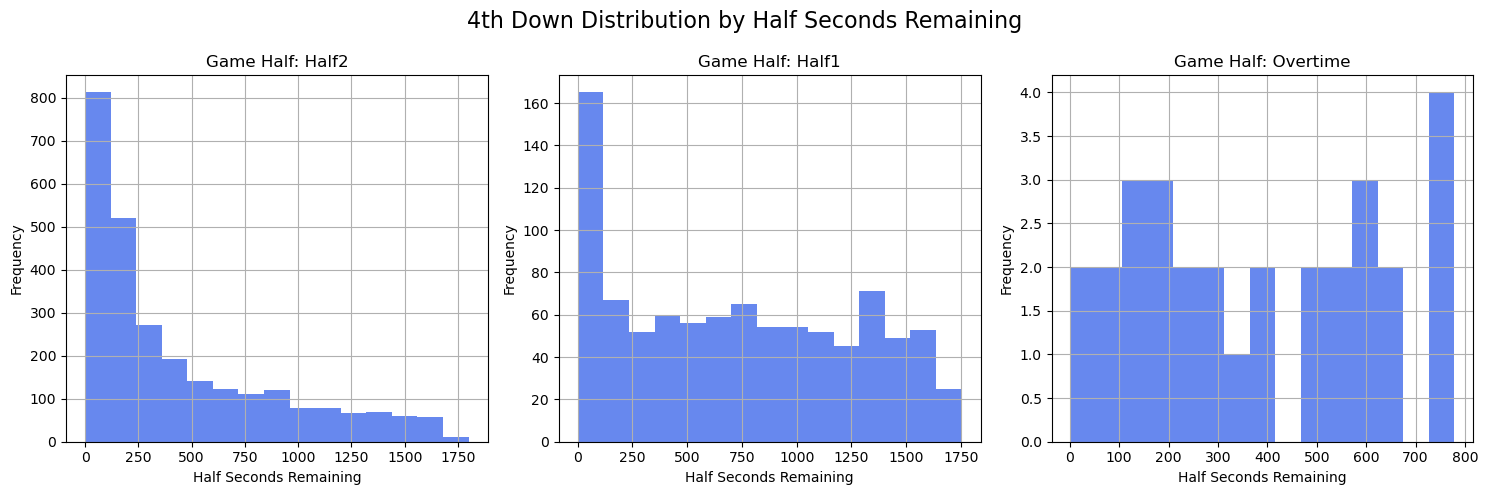

In [13]:
plot_histograms_by_half(raw_data)

We can observe that most of the observations are presented in the 2nd half and there is a correlation between time and the number of observations; The less time left, the more times teams play fourth down.

The previous graphs are supported by 2 hypotheses:
1. During the first half, the choice to gamble seems to be more of a strategic issue, while
2. For the second half, the gamble seems to obey a question of necessity given the context of the game rather than strategy, so the less time left, the more 4th opportunities there are.

Given the hypotheses, we could believe that an important variable to consider within the model is time since it can find patterns given the difference in the nature of the hypotheses that support one or another type of play.

### 2.2.2. Where do 4th chances occur most frequently?
Having mapped certain hypotheses about the relevance of time within the framework of 4th opportunities, we move on to another variable, which is the location on the playing field where these 4th opportunities were developed.

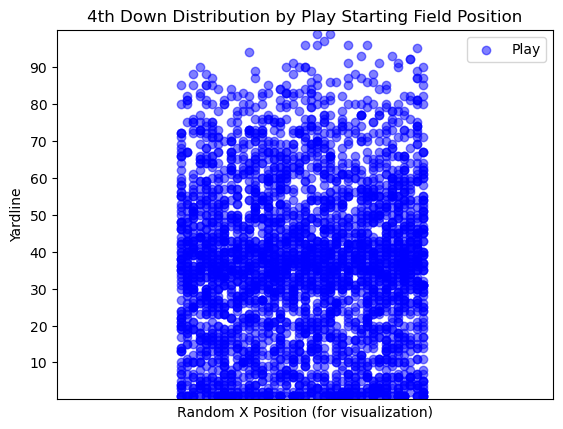

In [14]:
plot_field_position(raw_data)

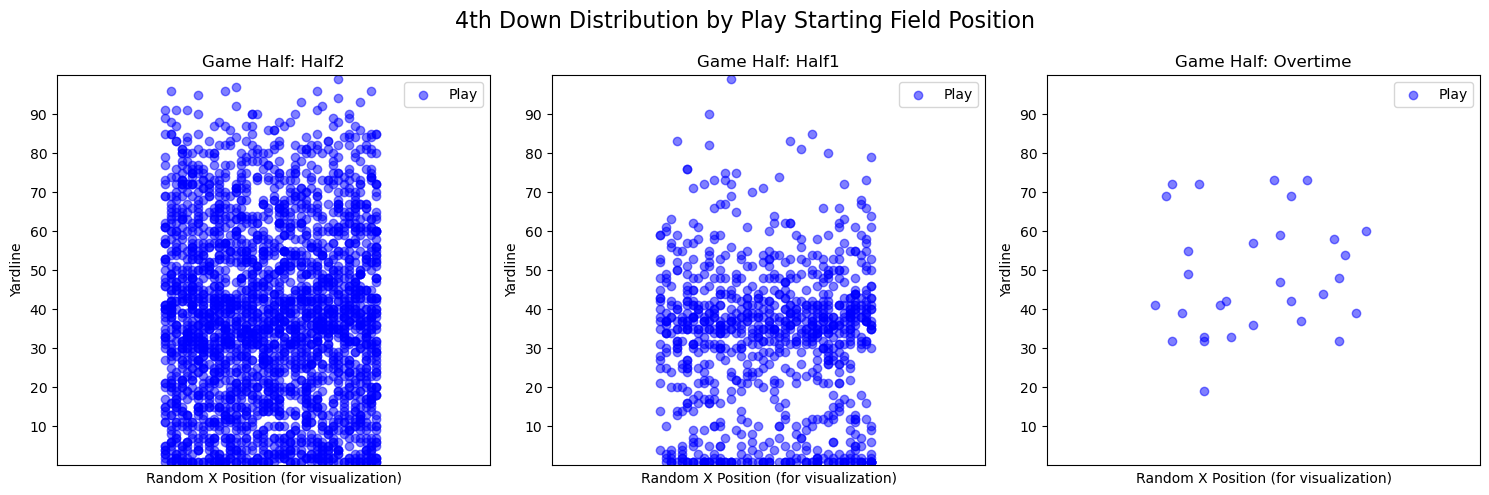

In [15]:
plot_position_by_half(raw_data)

From the previous images, we can observe clear patterns; The area of ​​the field where there are most observations is the central strip of the field (from the 30 to the 50 yard line). From the position of the land we can deduce that the distribution of the plays follows a trade-off between risk and reward; On one hand, the further into your territory you are (closer to the 0 yard line), the risk of playing a 4th down is very high and the benefit relatively low. On the other hand, the further you are from your side of the playing field, the more attractive the reward becomes, however on the first half coaches will be more tempted to kick a field goal instead of play a 4th down under the principle that it is better to have 3 safe points than 7 unsafe ones, and lastly we have those from the zone that we will call neutral (too far away to attempt a field goal and far enough so that the risk is not so much) that, apart from being, where there is the most data density. 

This being said, we can validate the importance of the location of the playing field for the model.

### 2.2.3. About the strategy of these 4th opportunities
What types of plays have head coaches opted for and under what circumstances?

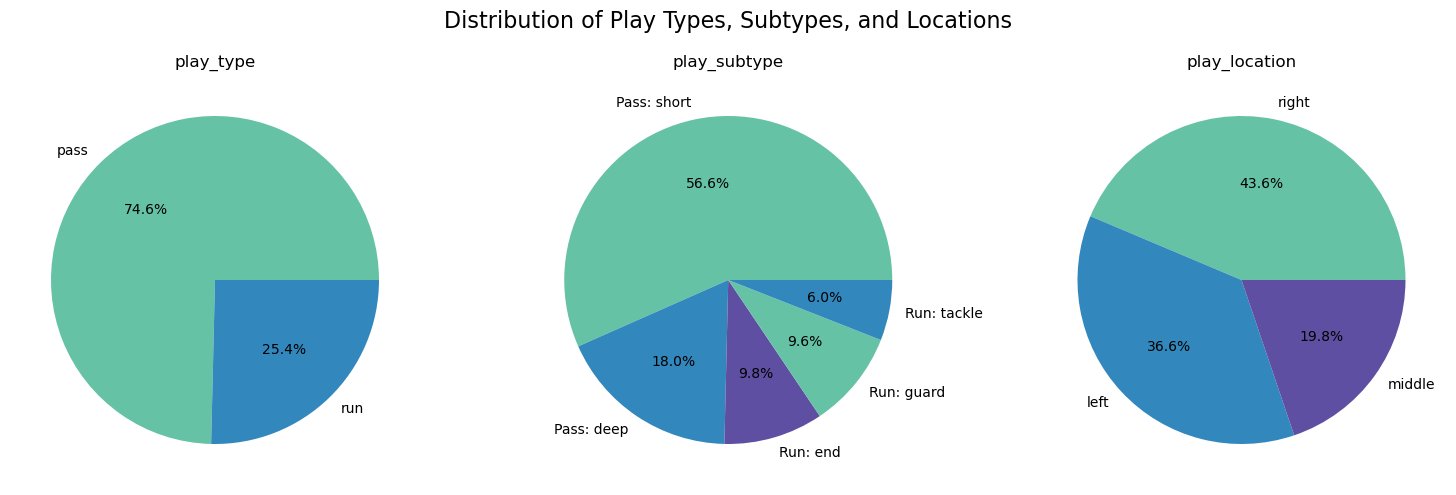

In [16]:
plot_pie_charts(raw_data)

We can see that 75% of the observations are passing plays, it seems like a high proportion, to explain it we will explore in which contexts we can observa a given effect por each type of play. As for the breakdown by subtype of plays, the insights are even more interesting. We see a surprisingly high 18% of long yardage plays and a very even split between runs attacking guards, tackles and defensive wings.

The breakdown by play motivates us to answer the following question: When do NFL coaches prefer a certain play?

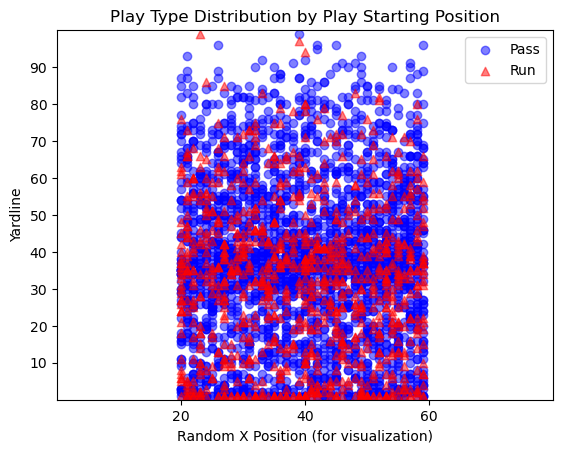

In [17]:
plot_play_type_distribution(raw_data)

Some very interesting first conclusions can be derived from the previous image, on the one hand we can see that there is a clear pattern regarding the selection of plays according to the position of the field; It can be seen how before their own half of the field the coaches play more conservatively with running plays and how as the progress in the field they begin to be aggressive with passing plays. This previous description clearly addresses, once again, the trade off between risk and reward that we have spoken earlier. This idea supports the argument that the type of play will also be an important variable so that the model can generate adequate predictions.

### 2.2.4. The odds on 4th chances
To no one's surprise, the decision to play it or not will be influenced by the probability of being able to convert that 4th opportunity (when there is no talk of a need, given the state of the game, to choose to play it). So, how has the probability of conversion behaved in these 9 years of sample that we have?

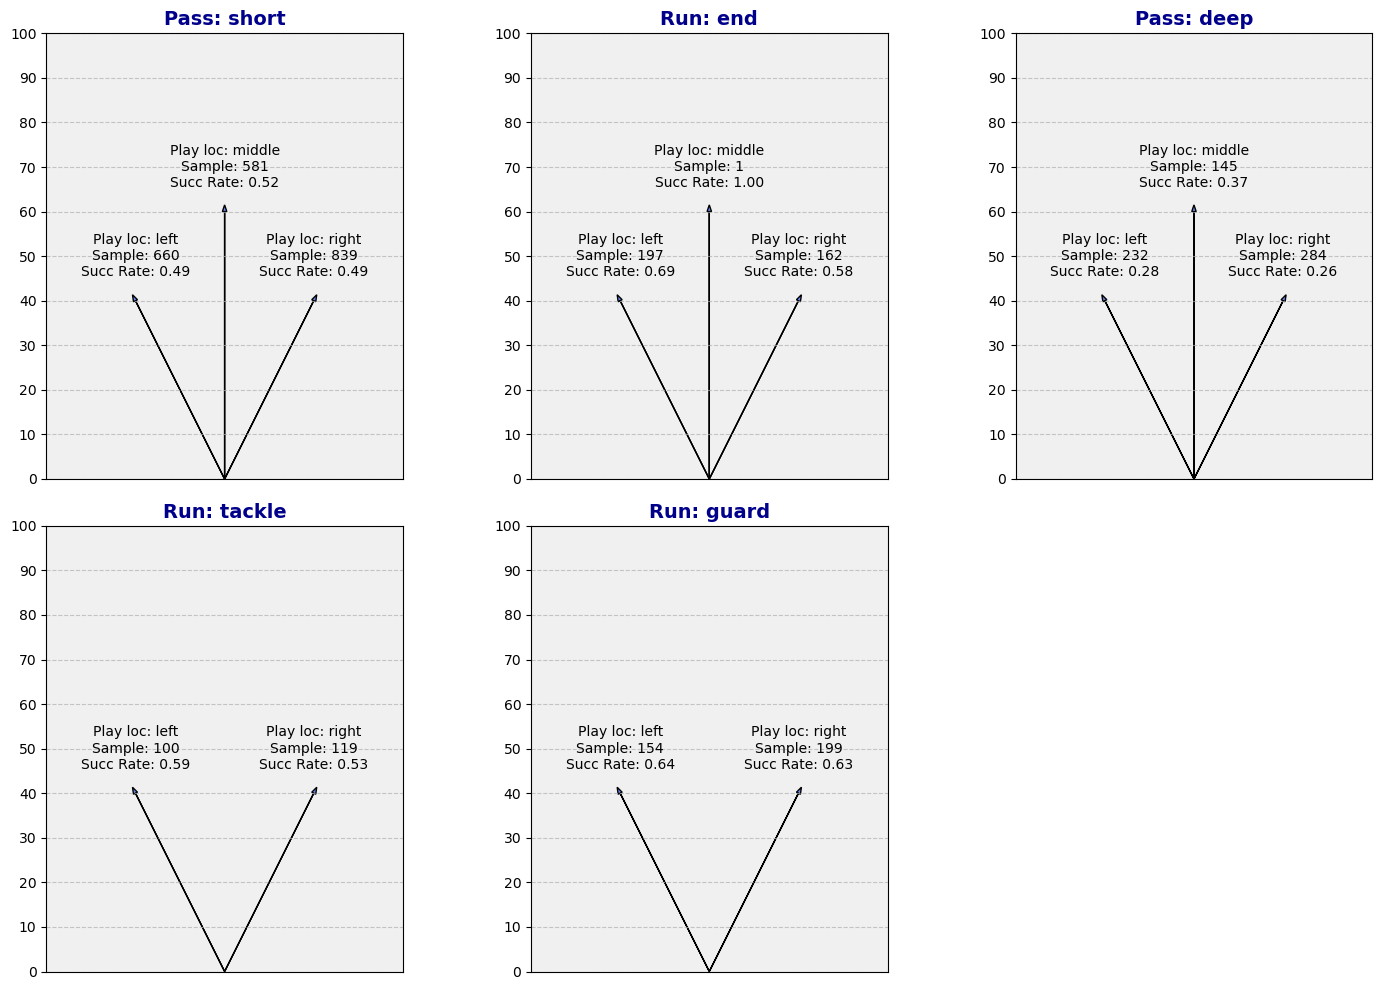

In [18]:
plot_success_rates(raw_data)

We can clearly observe that the side chosen to attack the rival seems to be marginal (in terms of success rate), so leaving the variable could introduce noise to the model, so it will be decided to omit this variable. Lastly, and although it can be obvious, the most important variable of all is ydstogo. Clearly converting a 4th and 7 will be more complicated than converting a 4th and 2.

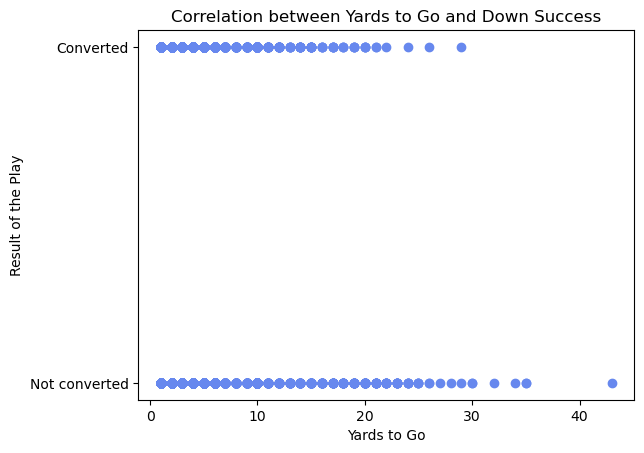

In [19]:
plot_correlation(raw_data)

## 3. First conclusions
During this EDA we were able to see the influence that some variables have on 4th opportunities and their correlation between success or failure. We were able to observe that there is clearly a correlation with the number of yards to advance. Interestingly, time was an important variable because it shifted the focus between strategy and need. Likewise, the location on the playing field and its distribution by type of play gave clarity to understand in which contexts the coaches define their strategy and gives room to analyze the probability of going against these tendencies to use it as a "surprise" factor. because yes (there are not only offensive strategies). The attack location was also discarded as a relevant variable and the following assumptions were made for model selection.

1. The probability of the plays seems to be almost random (50/50). From this, we can assume that a linear model (no matter how well the selected features are) will struggle to make the necessary recommendations, although the benchmark model simplicity of interpretation and implementation a linear model (logistic regression) will be implemented. Although perhaps an SVM, neural or tree-based model can better find that decision boundary.
2. Aside from the variables, the observations that occurred in the last seconds of the game will be eliminated because the development of that play addresses an eventuality rather than a strategic situation.
3. A statistical analysis is proposed to complete the EDA.